### Description

#### Etan Ogbemi
#### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

#### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.

* Geography: A customer’s location

* Gender: It defines the Gender of the customer

* Age: Age of the customer

* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values. This is the dependent variable and our model will be used to predict if a customer is likely to leave the bank or not

              0=No ( Customer did not leave the bank )

              1=Yes ( Customer left the bank )



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import seaborn as sns
sns.set()
from pandas import DataFrame
from matplotlib import pyplot
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from collections import Counter
from keras import callbacks
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from random import shuffle
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import warnings
warnings.filterwarnings("ignore")

In [3]:
file = "/content/drive/MyDrive/Colab Notebooks/Churn.csv"
data1 = pd.read_csv(file)

### Exploratory Data Analysis

#### Our task here is to examine the data in order to prepare it for analysis using neural network techniques

In [4]:
# Examining the data structure
data1.shape

(10000, 14)

In [5]:
# Reviewing a sample of the data
data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# copying the data to another variable to avoid any changes to original data
df = data1.copy()

In [7]:
df.info()  # checking the data for type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Observation

#### We can see there are no null values in the data and the data types are appropriate

In [8]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

### Observation

#### We can see there are no duplicates in the data.  We also see that the surname and the customerID are superfluous for our purposes since we have unique row IDs, so we can drop them.  While neural networks are robust, adding unnecessary features will add to the computational cost

In [9]:
df.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)

In [10]:
df.info()  # checking the data for type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
# let's check for duplicate values in the data after removing the two features
df.duplicated().sum()

0

### EDA

It would be useful to review the number of unique values for the categorical features

In [12]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


### Note

The categorical features are not overly unbalanced, the gender balance is 55% male and 45% female.  Most of the customers are from france, about 50% while Germany and Spain constitute about 25% each of the customers

###  Observation

Function for creating Bar plots

In [2]:
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    df: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    Number = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(Number + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

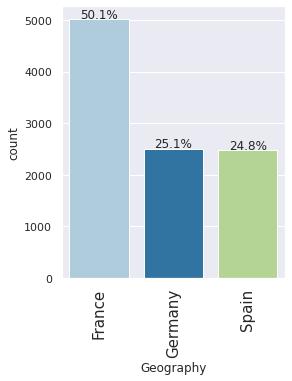

In [14]:
labeled_barplot(df, "Geography", perc=True)

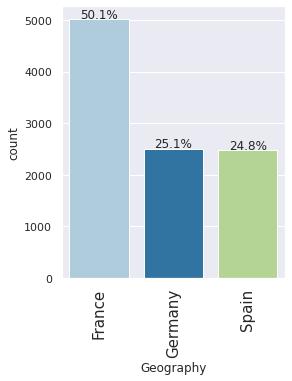

In [15]:
labeled_barplot(df, "Geography", perc=True)

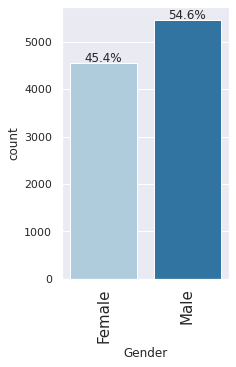

In [16]:
labeled_barplot(df, "Gender", perc=True)

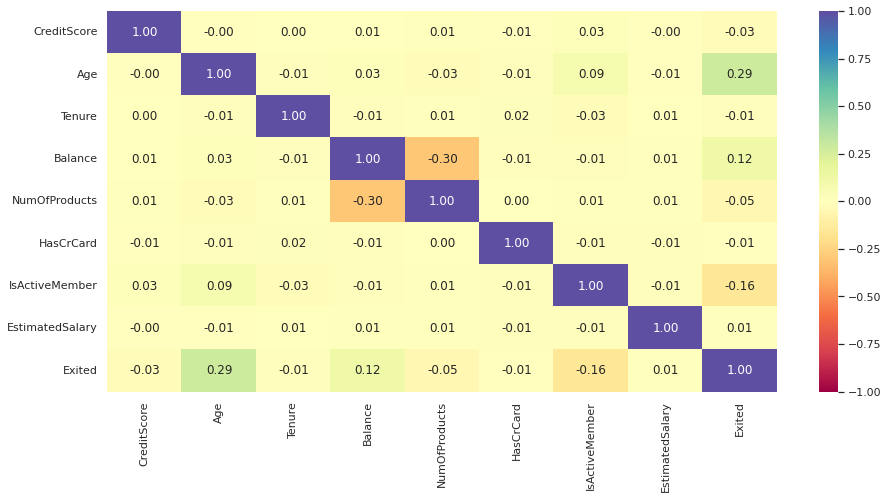

In [17]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [19]:
# sns.pairplot(data=df, diag_kind="kde")
# plt.show()

In [20]:
# plt.figure(figsize=(15,10))
# sns.barplot(data=df,x='Gender',y='CreditScore',hue='NumOfProducts')
# plt.show()

In [21]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

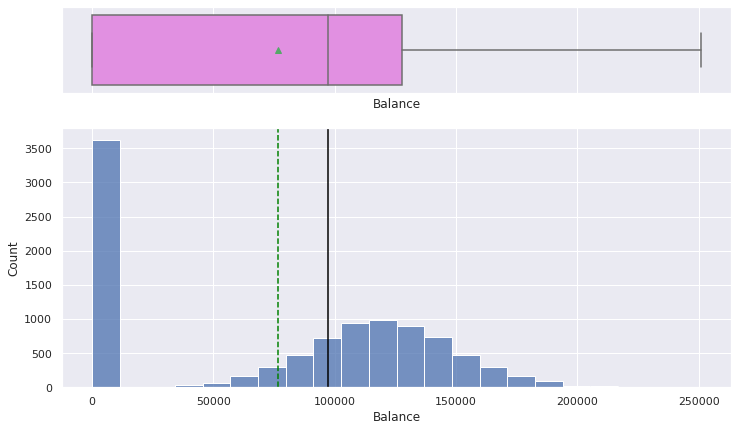

In [22]:
histogram_boxplot(df, "Balance")

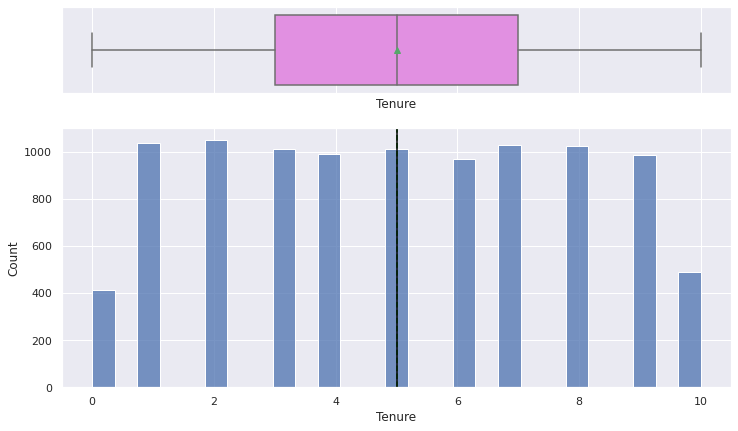

In [23]:
histogram_boxplot(df, "Tenure")

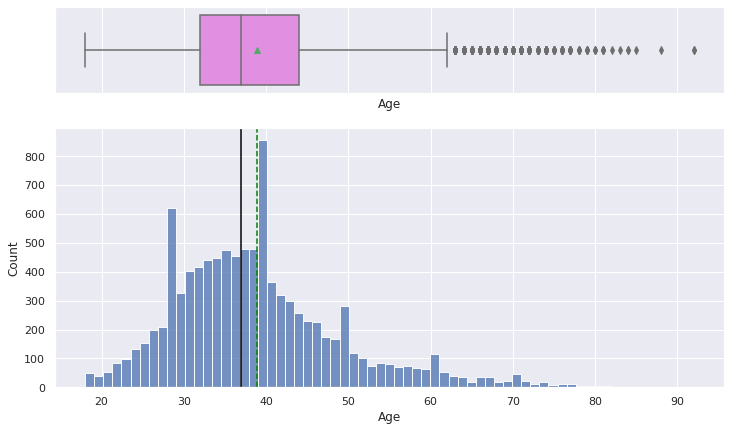

In [24]:
histogram_boxplot(df, "Age")

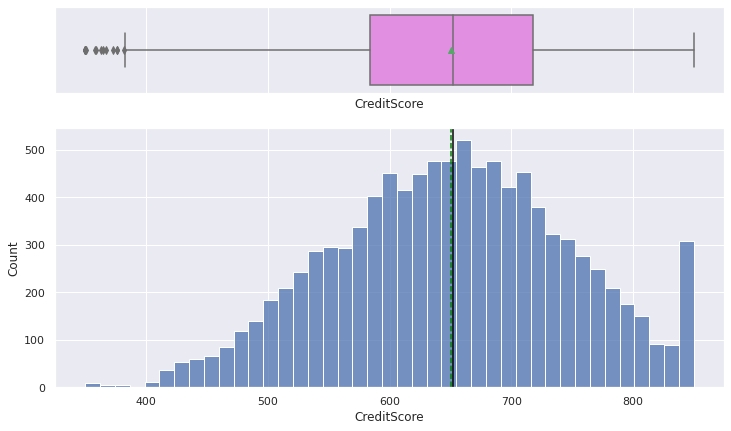

In [25]:
histogram_boxplot(df, "CreditScore")

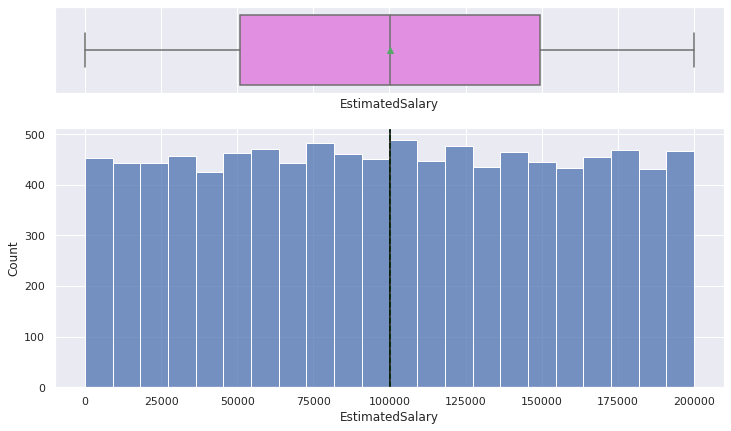

In [26]:
histogram_boxplot(df, "EstimatedSalary")

0    7963
1    2037
Name: Exited, dtype: int64


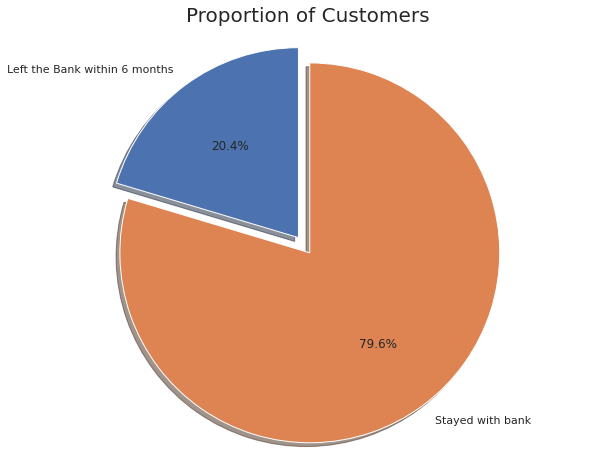

In [27]:
print(df.Exited.value_counts())
labels = 'Left the Bank within 6 months', 'Stayed with bank'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [df.Exited[df['Exited']==1].count(),df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Customers", size = 20)
plt.show()

In [28]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, Exited):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[Exited].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[Exited] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[Exited] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=Exited, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=Exited,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

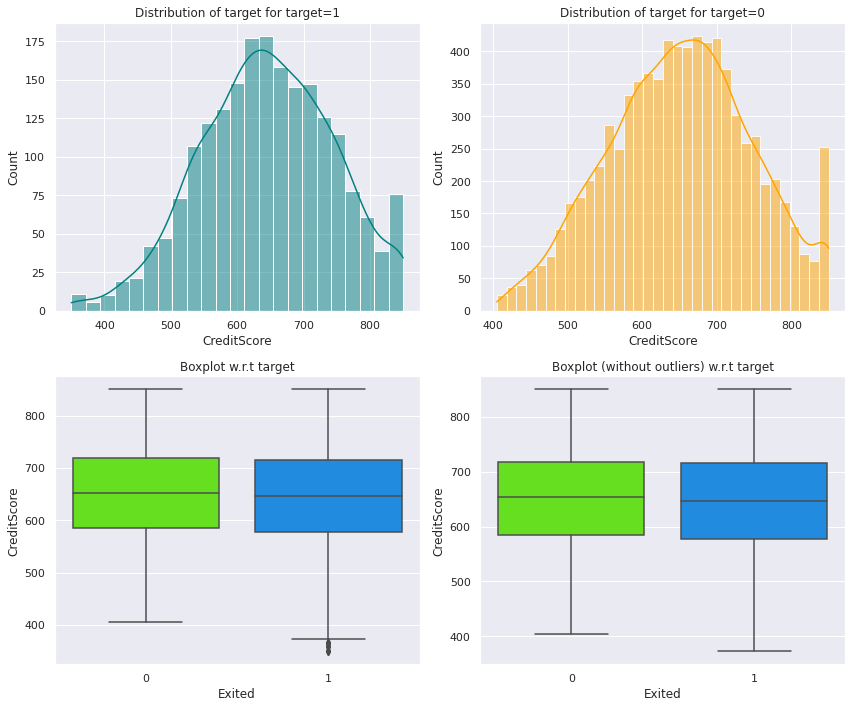

In [29]:
distribution_plot_wrt_target(df, "CreditScore", "Exited")

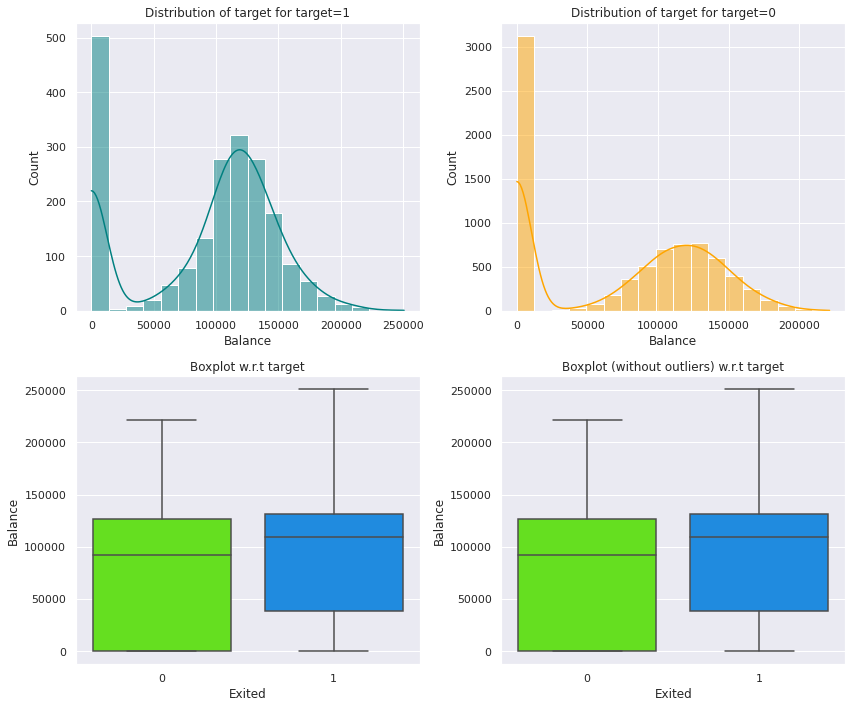

In [30]:
distribution_plot_wrt_target(df, "Balance", "Exited")

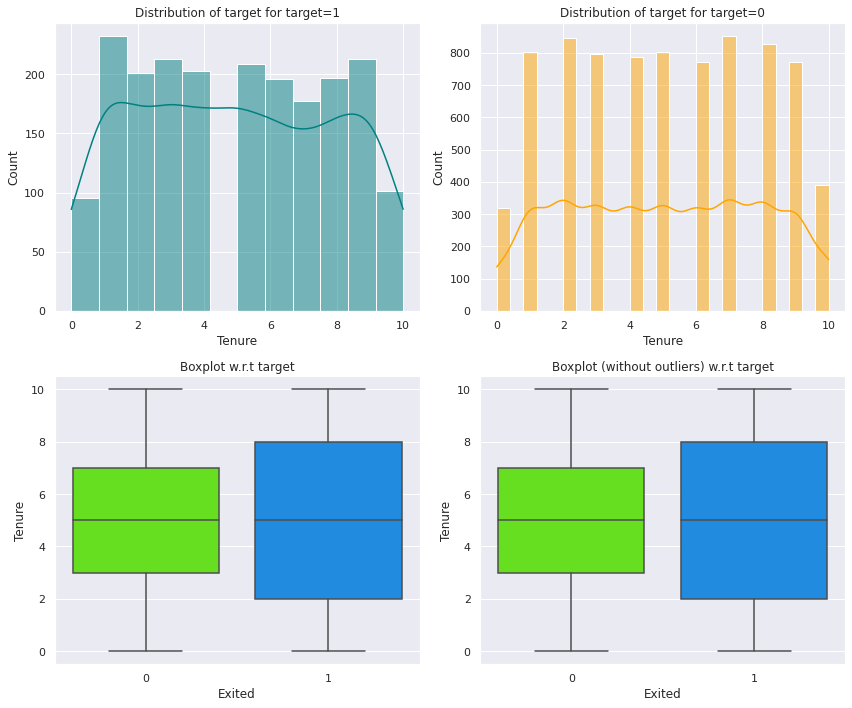

In [31]:
distribution_plot_wrt_target(df, "Tenure", "Exited")

### Observation

It appears from the above that customers with credit scores below 300 tend to leave the bank within 6 months.  They were probably seeking credit by joining the bank and left when they couldn't get any credit bvecause of their bad credit rating

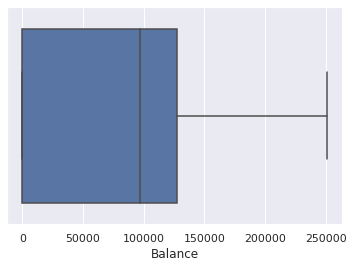

In [32]:
sns.boxplot(df['Balance'],orient='v')
plt.show()

In [33]:
# sns.boxplot(data = df,x='CreditScore',y='Tenure', hue=df['Exited']);

### Observation

For Neural networks it is best practice to normalise the data to aid fast convergence and speed up learning so we will do this

In [34]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

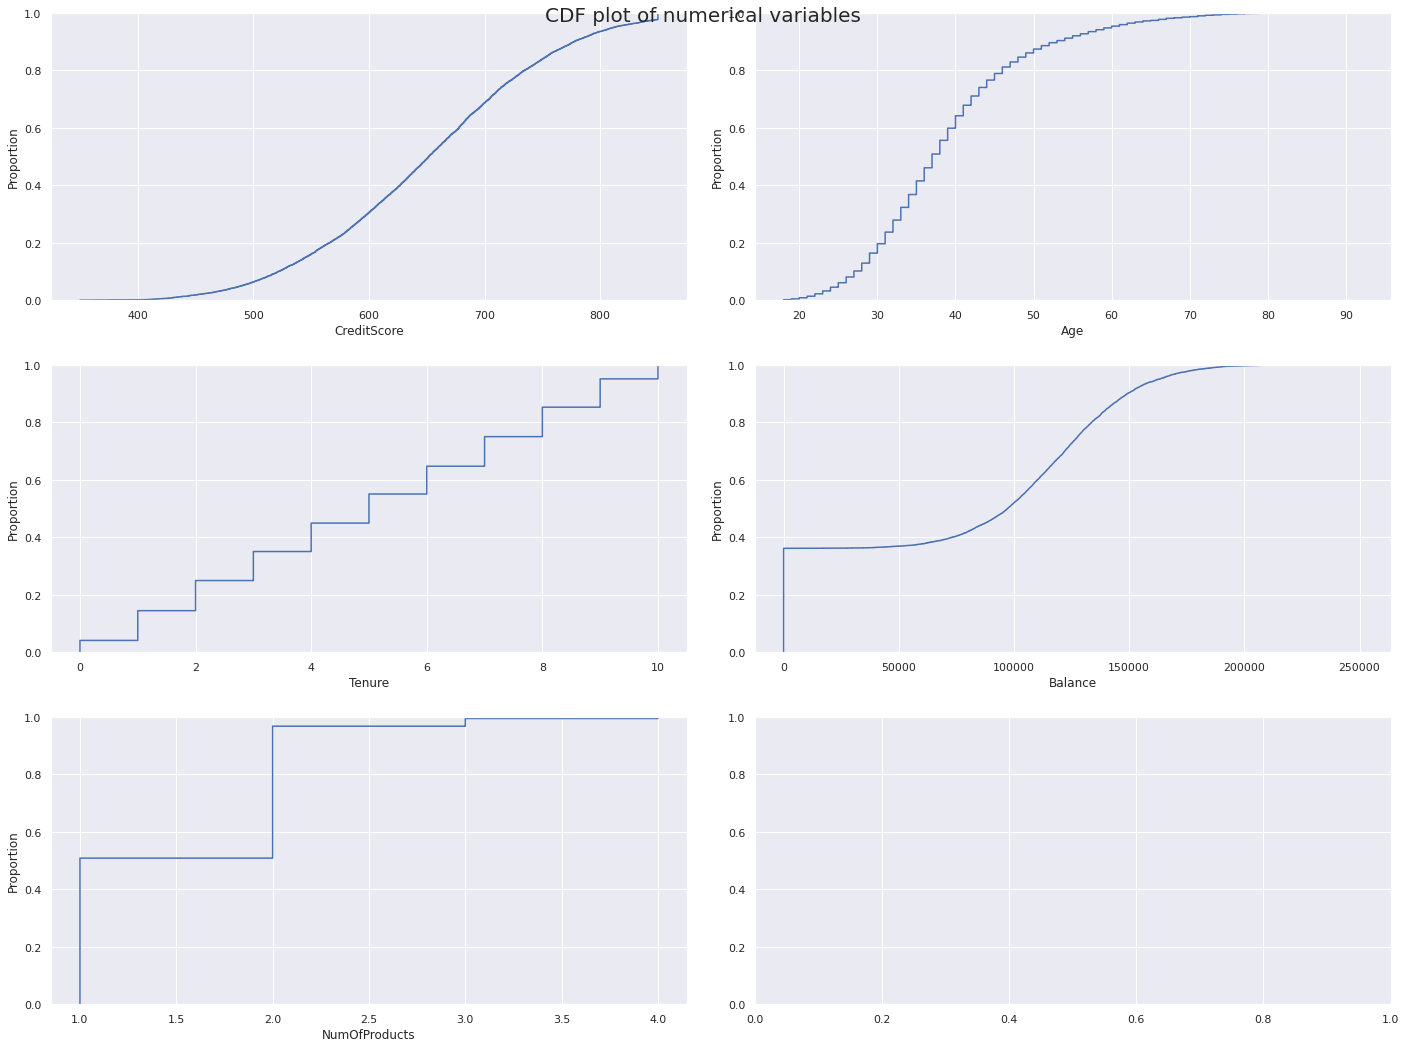

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

###  Encode the geography and Gender features

In [36]:
dummies = pd.get_dummies(df[['Geography', 'Gender']], drop_first=True)
df = pd.concat([df.drop(['Geography', 'Gender'],axis=1), dummies],axis=1)

In [37]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [38]:
# pd.get_dummies(data=df, columns=['Geography', 'Gender'], drop_first=True)
# df = pd.concat([df,pd.get_dummies(df['Geography', 'Gender'], drop_first=True)],axis=1)
# df.drop(['Geography', 'Gender'],axis=1, inplace=True)

In [39]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Observation

When we look at the mini and max values of the various features we can see that the variables for the features are on very different scales with orders of magnitude of differences.  For example the range between min and max values for HasCrCard have a span of 1 unit while the range between the min and max values for, say,  Balance is  0 to 250,000.  This can allow some features to dominate others when building models so we must perform scaling on the data.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [41]:
# selecting numerical values only
subset = df.values[:, :,]
# scaling the subset of the dataframe df
trans = StandardScaler()
scaled_subset = trans.fit_transform(subset)
# convert the array back to a dataframe
subset_scaled_df = DataFrame(scaled_subset)
# Returning the column headers stripped by scikit
subset_scaled_df = pd.DataFrame(scaled_subset, columns = df.columns)
# print(subset.shape)

In [42]:
subset_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  float64
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


In [43]:
# subset_scaled_df

### Observation

We will split our data in to training, test and validation

In [44]:
X = df.drop(["Exited"], axis=1)
Y = df[["Exited"]]

In [45]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
     X, Y, test_size=0.2, random_state=1, stratify=Y
 )
 
# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
     X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
 )
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [47]:
###Checking the shape of train and test sets
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

### Building the model


Model 1

In [48]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [49]:
# Creating the model
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension, there are 11 inputs) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [50]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [52]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=16,verbose=1)

Epoch 1/50
300/300 [==============================] - 4s 4ms/step - loss: 403.2637 - accuracy: 0.6833 - val_loss: 211.4952 - val_accuracy: 0.7942
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 192.5718 - accuracy: 0.6748 - val_loss: 27.9999 - val_accuracy: 0.7400
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 209.9833 - accuracy: 0.6798 - val_loss: 224.0647 - val_accuracy: 0.7167
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 172.6458 - accuracy: 0.6854 - val_loss: 227.1136 - val_accuracy: 0.7942
Epoch 5/50
300/300 [==============================] - 1s 3ms/step - loss: 164.7731 - accuracy: 0.6781 - val_loss: 52.9460 - val_accuracy: 0.7917
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 131.0883 - accuracy: 0.6750 - val_loss: 137.2747 - val_accuracy: 0.6117
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss: 112.5764 - accuracy: 0.6777 - val_loss: 95.0521 - va

63/63 [==============================] - 0s 4ms/step - loss: 21.8848 - accuracy: 0.5030


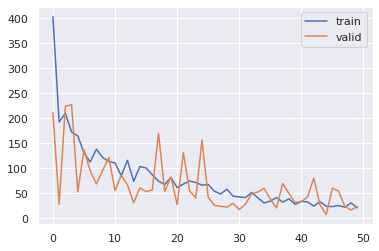

In [53]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

### Calculating the (AUC) area under the ROC curve to see how well the model can differentiate between the classes

Best Threshold=0.999999, G-Mean=0.591


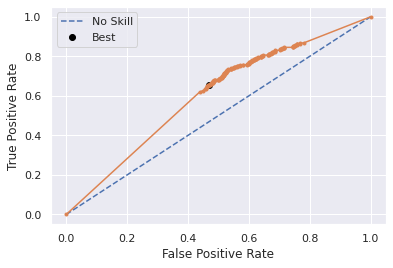

In [54]:
# predict probabilities
yhat2 = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans2[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [55]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

In [56]:
y_pred_e1=model.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

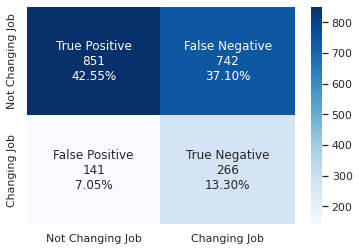

In [57]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Model 2

In [58]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [59]:
# Create optimizer with default learning rate
# Compile the model
# model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               3072      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


In [61]:
history=model1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1)

Epoch 1/50
75/75 [==============================] - 1s 7ms/step - loss: 2166.2332 - accuracy: 0.6750 - val_loss: 968.1648 - val_accuracy: 0.4667
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 1314.5219 - accuracy: 0.6742 - val_loss: 731.2874 - val_accuracy: 0.4550
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 728.1769 - accuracy: 0.6748 - val_loss: 702.7207 - val_accuracy: 0.7942
Epoch 4/50
75/75 [==============================] - 0s 5ms/step - loss: 714.3356 - accuracy: 0.6700 - val_loss: 375.7020 - val_accuracy: 0.7917
Epoch 5/50
75/75 [==============================] - 0s 5ms/step - loss: 663.7250 - accuracy: 0.6819 - val_loss: 1086.9464 - val_accuracy: 0.7933
Epoch 6/50
75/75 [==============================] - 0s 5ms/step - loss: 528.3960 - accuracy: 0.6785 - val_loss: 408.4126 - val_accuracy: 0.7942
Epoch 7/50
75/75 [==============================] - 0s 5ms/step - loss: 348.2017 - accuracy: 0.6823 - val_loss: 808.8993 - val_accura

63/63 [==============================] - 0s 3ms/step - loss: 67.0038 - accuracy: 0.2115


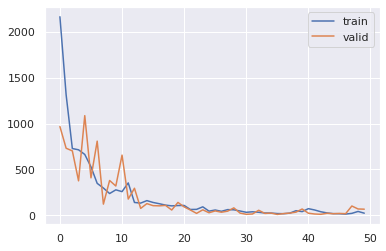

In [62]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1.evaluate(X_test, y_test)

Best Threshold=1.000000, G-Mean=0.380


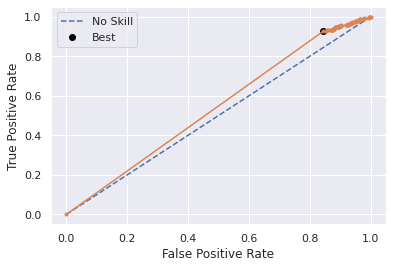

In [63]:
# predict probabilities
yhat2 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [64]:
y_pred_e2=model1.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

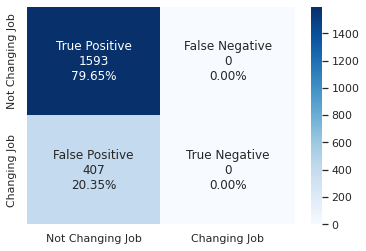

In [65]:
#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')